# **Controlling Air Pollution:**

Problem Source: F. S. Hillier and G. J. Lieberman, "Introduction to Mathematical Programming," 2nd Edition, McGraw-Hill Inc., New York, 1995.

**Problem Statement:**

The NORI & LEETS CO., one of the major producers of steel in its part of the world, is located in the city of Steeltown and is the only large employer there. Steeltown has grown and prospered along with the company, which now employs nearly $50,000$ residents. Therefore, the attitude of the townspeople always has been, "What's good for Nori & Leets is good for the town." However, this attitude is now changing; uncontrolled air pollution from the company's furnaces is ruining the appearance of the city and endangering the health of its residents.

A recent stockholders' revolt resulted in the election of a new enlightened board of directors for the company. These directors are determined to follow socially responsible policies, and they have been discussing with Steeltown city officials and citizens' groups what to do about the air pollution problem. Together they have worked out stringent air quality standards for the Steeltown airshed.

The three main types of pollutants in this airshed are particulate matter, sulfur oxides, and hydrocarbons. The new standards require that the company reduce its annual emission of these pollutants by the amounts shown in Table 3.12. The board of directors has instructed management to have the engineering staff determine how to achieve these reductions in the most economical way.

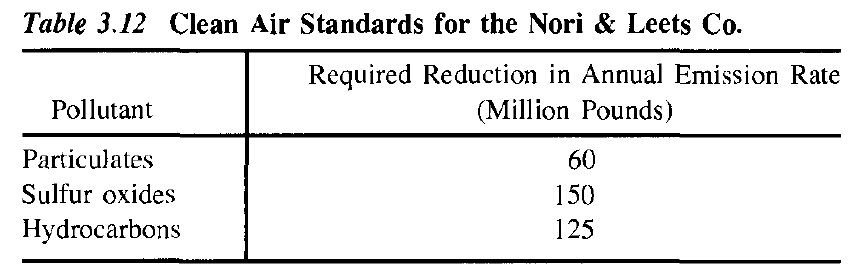

The steelworks has two primary sources of pollution, namely, the blast furnaces
for making pig iron and the open-hearth furnaces for changing iron into steel. In both cases the engineers have decided that the most effective types of abatement methods are
(1) increasing the height of the smokestacks, 1 (2) using filter devices (including gas traps) in the smokestacks, and (3) including cleaner, high-grade materials among the fuels for the furnaces. Each of these methods has a technological limit on how heavily it can be used (e.g., a maximum feasible increase in the height of the smokestacks), but there also is considerable flexibility for using the method at a fraction of its technological limit.

Table 3.13 shows how much emission (in millions of pounds per year) can be
eliminated from each type of furnace by fully using any abatement method to its technological limit. For purposes of analysis, it is assumed that each method also can be used less fully to achieve any fraction of the emission-rate reductions shown in this table. Furthermore, the fractions can be different for blast furnaces and for open-hearth furnaces. For either type of furnace, the emission reduction achieved by each method is not substantially affected by whether the other methods also are used.

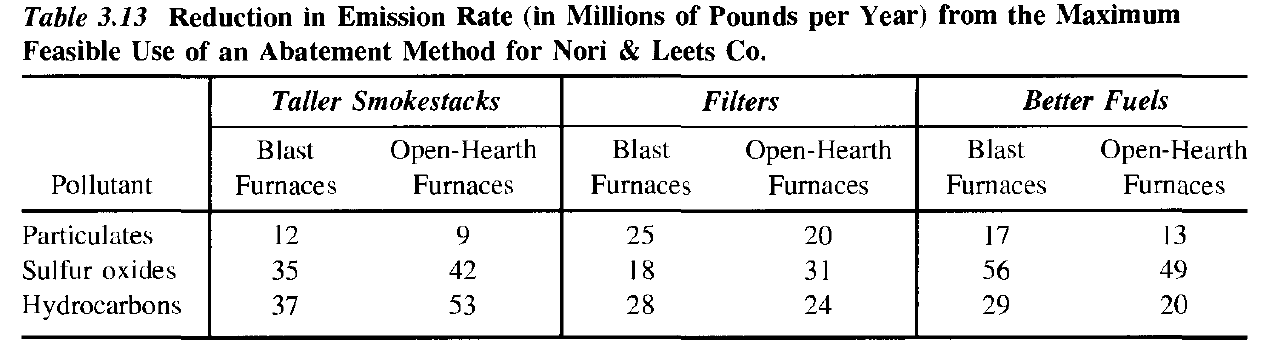

After these data were developed, it became clear that no single method by itself
could achieve all the required reductions. On the other hand, combining all three methods at full capacity on both types of furnaces (which would be prohibitively expensive if the company's products are to remain competitively priced) is much more than adequate. Therefore, the engineers concluded that they would have to use some combination of the methods, perhaps with fractional capacities, based upon the relative costs. Furthermore, because of the differences between the blast and the open-hearth furnaces, the two types probably should not use the same combination.

An analysis was conducted to estimate the total annual cost that would be incurred by each abatement method. A method's annual cost includes increased operating and maintenance expenses as well as reduced revenue due to any loss in the efficiency of the production process caused by using the method. The other major cost is the start-up cost (the initial capital outlay) required to install the method. To make this one-time cost commensurable with the ongoing annual costs, the time value of money was used to calculate the annual expenditure ( over the expected life of the method) that would be equivalent in value to this start-up cost.

This analysis led to the total annual cost estimates (in millions of dollars) given in Table 3.14 for using the methods at their full abatement capacities. It also was determined that the cost of a method being used at a lower level is roughly proportional to the fraction of the abatement capacity given in Table 3.13 that is achieved. Thus, for any given fraction achieved, the total annual cost would be roughly that fraction of the corresponding quantity in Table 3. 14.

The stage now was set to develop the general framework of the company's plan
for pollution abatement. This plan specifies which types of abatement methods will be used and at what fractions of their abatement capacities for (I) the blast furnaces and (2) the open-hearth furnaces. Because of the combinatorial nature of the problem of finding a plan that satisfies the requirements with the smallest possible cost, an OR team was formed to solve the problem.

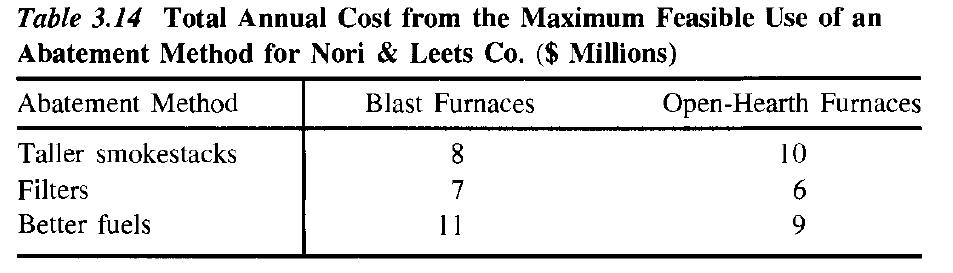

**Modeling:**

$\\ $

$Objective\ Function:\\ $

These variables represent the use of one of the three abatement methods for one of the two types of furnaces:

$x_{ij}\ for\ i\ in\$ taller smokestacks, filters, better fuels

$\\ \\ \\ \\ for\ j\ in\$ blast furnaces, open-heart furnaces

$\\ $

$Constraints:\\ $

$Min\ Z= 8x_{11}+7x_{21}+11x_{31}+10x_{12}+6x_{22}+9x_{32}$

1. Emission reduction:

$12x_{11}+9x_{12}+25x_{21}+20x_{22}+17x_{31}+13x_{32} \geq 60$

$35x_{11}+42x_{12}+18x_{21}+31x_{22}+56x_{31}+49x_{32} \geq 150$

$37x_{11}+53x_{12}+28x_{21}+24x_{22}+29x_{31}+20x_{32} \geq 125$

2. Technological limit:

$x_{ij} \geq 1$

3. Nonnegativity:

$x_{ij} \leq 0$

In [1]:
!pip install pulp
from pulp import *
import numpy as np
import pandas as pd

In [2]:
#Defining the problem

AbatementMethod = [1, 2, 3]
ProductionSource = [1, 2]

coefficients = {
    (1, 1): 8,
    (2, 1): 7,
    (3, 1): 11,
    (1, 2): 10,
    (2, 2): 6,
    (3, 2): 9
}

reduction_coefficients1 = {
    (1, 1): 12,
    (2, 1): 25,
    (3, 1): 17,
    (1, 2): 9,
    (2, 2): 20,
    (3, 2): 13
}

reduction_coefficients2 = {
    (1, 1): 35,
    (2, 1): 18,
    (3, 1): 56,
    (1, 2): 42,
    (2, 2): 31,
    (3, 2): 49
}

reduction_coefficients3 = {
    (1, 1): 37,
    (2, 1): 28,
    (3, 1): 29,
    (1, 2): 53,
    (2, 2): 24,
    (3, 2): 20
}

In [3]:
#Defining variables

x = LpVariable.dicts('x', ((i,j) for i in AbatementMethod for j in ProductionSource), lowBound=0, upBound=1, cat='Continuous')

In [4]:
x

{(1, 1): x_(1,_1),
 (1, 2): x_(1,_2),
 (2, 1): x_(2,_1),
 (2, 2): x_(2,_2),
 (3, 1): x_(3,_1),
 (3, 2): x_(3,_2)}

In [5]:
#Defining Objective Function

Model= LpProblem('Air_Pollution', LpMinimize)

Model += lpSum(coefficients[(i,j)]*x[(i,j)] for (i,j) in coefficients)

In [6]:
#Constraints

Model += lpSum(reduction_coefficients1[(i,j)]*x[(i,j)] for (i,j) in coefficients) >= 60
Model += lpSum(reduction_coefficients2[(i,j)]*x[(i,j)] for (i,j) in coefficients) >= 150
Model += lpSum(reduction_coefficients3[(i,j)]*x[(i,j)] for (i,j) in coefficients) >= 125

In [7]:
#Model summary

Model

Air_Pollution:
MINIMIZE
8*x_(1,_1) + 10*x_(1,_2) + 7*x_(2,_1) + 6*x_(2,_2) + 11*x_(3,_1) + 9*x_(3,_2) + 0
SUBJECT TO
_C1: 12 x_(1,_1) + 9 x_(1,_2) + 25 x_(2,_1) + 20 x_(2,_2) + 17 x_(3,_1)
 + 13 x_(3,_2) >= 60

_C2: 35 x_(1,_1) + 42 x_(1,_2) + 18 x_(2,_1) + 31 x_(2,_2) + 56 x_(3,_1)
 + 49 x_(3,_2) >= 150

_C3: 37 x_(1,_1) + 53 x_(1,_2) + 28 x_(2,_1) + 24 x_(2,_2) + 29 x_(3,_1)
 + 20 x_(3,_2) >= 125

VARIABLES
x_(1,_1) <= 1 Continuous
x_(1,_2) <= 1 Continuous
x_(2,_1) <= 1 Continuous
x_(2,_2) <= 1 Continuous
x_(3,_1) <= 1 Continuous
x_(3,_2) <= 1 Continuous

In [8]:
#Solving model

Model.solve()
print('Optimal Solution:', pulp.value(Model.objective))

Optimal Solution: 32.154631276


In [9]:
#Optimal values of variables

for variables in Model.variables():
  print(f'{variables.name}:{variables.varValue}')

x_(1,_1):1.0
x_(1,_2):0.62269745
x_(2,_1):0.3434794
x_(2,_2):1.0
x_(3,_1):0.047572816
x_(3,_2):1.0


In [10]:
VNames = []
for variables in Model.variables():
  VNames.append(variables.name)

VValue = []
for variables in Model.variables():
  VValue.append(np.round(variables.varValue, 2))

data = {'Variables': VNames, 'Value': VValue}
pd.DataFrame(data, index = range(1, len(VValue)+1))

,Variables,Value
1,"x_(1,_1)",1.00
2,"x_(1,_2)",0.62
3,"x_(2,_1)",0.34
4,"x_(2,_2)",1.00
5,"x_(3,_1)",0.05
6,"x_(3,_2)",1.00


In [11]:
print('Current Status: ', LpStatus[Model.status])

Current Status:  Optimal
